In [2]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
raw_df = pd.read_csv('Data/fabrizioromanoherewego.csv')

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        120 non-null    int64  
 1   text                           120 non-null    object 
 2   post_text                      120 non-null    object 
 3   shared_text                    0 non-null      float64
 4   original_text                  0 non-null      float64
 5   time                           120 non-null    object 
 6   timestamp                      120 non-null    int64  
 7   image                          114 non-null    object 
 8   image_lowquality               120 non-null    object 
 9   images                         120 non-null    object 
 10  images_description             120 non-null    object 
 11  images_lowquality              120 non-null    object 
 12  images_lowquality_description  120 non-null    obj

In [6]:
raw_df.describe()

,post_id,shared_text,original_text,timestamp,video_duration_seconds,video_height,video_id,video_quality,video_size_MB,video_watches,...,factcheck,shared_post_id,shared_time,shared_user_id,shared_username,shared_post_url,reaction_count,page_id,sharers,image_id
count,1.200000e+02,0.0,0.0,1.200000e+02,0.0,0.0,3.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,120.000000,1.200000e+02,0.0,1.130000e+02
mean,9.505735e+14,NaN,NaN,1.701115e+09,NaN,NaN,7.595873e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,59203.091667,1.145898e+14,NaN,9.505516e+14
std,7.866216e+11,NaN,NaN,1.113913e+05,NaN,NaN,4.110669e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,60706.913514,0.000000e+00,NaN,7.810976e+11
min,9.493145e+14,NaN,NaN,1.700927e+09,NaN,NaN,3.734852e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5458.000000,1.145898e+14,NaN,9.493145e+14
25%,9.498830e+14,NaN,NaN,1.701017e+09,NaN,NaN,5.435107e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29069.250000,1.145898e+14,NaN,9.498794e+14
50%,9.504762e+14,NaN,NaN,1.701102e+09,NaN,NaN,7.135362e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,39501.500000,1.145898e+14,NaN,9.504491e+14
75%,9.512522e+14,NaN,NaN,1.701207e+09,NaN,NaN,9.526384e+14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,61289.250000,1.145898e+14,NaN,9.512127e+14
max,9.521348e+14,NaN,NaN,1.701333e+09,NaN,NaN,1.191741e+15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,484000.000000,1.145898e+14,NaN,9.521348e+14


In [7]:
raw_df.tail(5)

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,w3_fb_url,reactions,reaction_count,with,page_id,sharers,image_id,image_ids,was_live,fetched_time
115,949353396992152,Who’s gonna finish 𝐡𝐢𝐠𝐡𝐞𝐫 in PL? 👀✨,Who’s gonna finish 𝐡𝐢𝐠𝐡𝐞𝐫 in PL? 👀✨,NaN,NaN,2023-11-26 00:05:35,1700931935,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,NaN,NaN,42000,NaN,114589756608819,NaN,9.493534e+14,['949353370325488'],False,NaN
116,949335846993907,One more 3-0 win for Bayer 🔴⚫️🇩🇪\n\nXabi Alons...,One more 3-0 win for Bayer 🔴⚫️🇩🇪\n\nXabi Alons...,NaN,NaN,2023-11-25 23:28:44,1700929724,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,NaN,NaN,87000,NaN,114589756608819,NaN,9.493358e+14,['949335800327245'],False,NaN
117,949333873660771,Chelsea are 3-1 down vs Newcastle now! ⚪️⚫️,Chelsea are 3-1 down vs Newcastle now! ⚪️⚫️,NaN,NaN,2023-11-25 23:24:41,1700929481,https://m.facebook.com/photo/view_full_size/?f...,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,['https://m.facebook.com/photo/view_full_size/...,...,NaN,NaN,39000,NaN,114589756608819,NaN,9.493338e+14,['949333826994109'],False,NaN
118,949329466994545,🔵🔴🇧🇷 Barça director Deco: “It has not yet been...,🔵🔴🇧🇷 Barça director Deco: “It has not yet been...,NaN,NaN,2023-11-25 23:15:28,1700928928,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-4.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-4.fna.fbcdn.net/v/t39...,...,NaN,NaN,30000,NaN,114589756608819,NaN,9.493295e+14,['949329450327880'],False,NaN
119,949314523662706,🚨🔴 Klopp: “We lost Diogo Jota with a muscle bu...,🚨🔴 Klopp: “We lost Diogo Jota with a muscle bu...,NaN,NaN,2023-11-25 22:43:00,1700926980,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,https://scontent.fhan2-3.fna.fbcdn.net/v/t39.3...,['https://scontent.fhan2-3.fna.fbcdn.net/v/t39...,...,NaN,NaN,38000,NaN,114589756608819,NaN,9.493145e+14,['949314503662708'],False,NaN


In [8]:
raw_df['time'] = pd.to_datetime(raw_df['time'])

In [9]:
df = raw_df[['time','timestamp' ,'reaction_count']]
df

,time,timestamp,reaction_count
0,2023-11-30 15:30:55,1701333055,5458
1,2023-11-30 14:30:21,1701329421,29110
2,2023-11-30 08:23:21,1701307401,35794
3,2023-11-30 05:27:09,1701296829,95055
4,2023-11-30 05:00:00,1701295200,59112
...,...,...,...
115,2023-11-26 00:05:35,1700931935,42000
116,2023-11-25 23:28:44,1700929724,87000
117,2023-11-25 23:24:41,1700929481,39000
118,2023-11-25 23:15:28,1700928928,30000


In [10]:
df['time'] = pd.to_datetime(df['time'])

df['date'] = df['time'].dt.date
df['time'] = df['time'].dt.time

df = df[::-1].reset_index(drop=True)


C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_18572\2096917023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'])
C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_18572\2096917023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df['time'].dt.date
C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_18572\2096917023.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [11]:
raw_df[['post_id', 'reactions']].head(10)

,post_id,reactions
0,952134820047343,"{'like': 4592, 'love': 776, 'haha': 25, 'wow':..."
1,952112546716237,"{'like': 21995, 'love': 6480, 'haha': 119, 'wo..."
2,951976760063149,"{'like': 25947, 'love': 689, 'haha': 8586, 'wo..."
3,951909296736562,"{'like': 71563, 'love': 21626, 'haha': 154, 'w..."
4,951897683404390,"{'like': 49187, 'love': 9093, 'haha': 83, 'wow..."
5,951869110073914,"{'like': 155731, 'love': 47615, 'haha': 279, '..."
6,951818136745678,"{'like': 61611, 'love': 12683, 'haha': 69, 'wo..."
7,951806140080211,"{'like': 19981, 'love': 1279, 'haha': 21, 'wow..."
8,951790760081749,"{'like': 48025, 'love': 7393, 'haha': 528, 'wo..."
9,951787750082050,"{'like': 114339, 'love': 27384, 'haha': 983, '..."


In [12]:
raw_df['reactions'] = raw_df['reactions'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df_reactions = raw_df['reactions'].apply(pd.Series)
df_reactions.head()


,like,love,haha,wow,care,angry,sad,0
0,4592.0,776.0,25.0,8.0,57.0,NaN,NaN,NaN
1,21995.0,6480.0,119.0,15.0,500.0,1.0,NaN,NaN
2,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,NaN
3,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,NaN
4,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,NaN


In [13]:
df_reactions = df_reactions.drop(df_reactions.columns[-1], axis=1)

df_reactions['reactions_count'] = df['reaction_count'].iloc[::-1].reset_index(drop=True)

for i in range (df_reactions.shape[0]):
    if pd.isna(df_reactions['like'].iloc[i]):
        df_reactions['like'].iloc[i] = (df_reactions['reactions_count'].iloc[i] * 0.75).round()
    if pd.isna(df_reactions['love'].iloc[i]):
        df_reactions['love'].iloc[i] = (df_reactions['reactions_count'].iloc[i] * 0.15).round()
    
df_reactions['haha'].fillna(df_reactions['haha'].median(), inplace=True)
df_reactions['wow'].fillna(df_reactions['wow'].median(), inplace=True)
df_reactions['care'].fillna(df_reactions['care'].median(), inplace=True)
df_reactions['angry'].fillna(df_reactions['angry'].median(), inplace=True)
df_reactions['sad'].fillna(df_reactions['sad'].median(), inplace=True)

df_reactions


C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_18572\3637342539.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reactions['like'].iloc[i] = (df_reactions['reactions_count'].iloc[i] * 0.75).round()
C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_18572\3637342539.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reactions['love'].iloc[i] = (df_reactions['reactions_count'].iloc[i] * 0.15).round()
C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_18572\3637342539.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

,like,love,haha,wow,care,angry,sad,reactions_count
0,4592.0,776.0,25.0,8.0,57.0,6.0,8.0,5458
1,21995.0,6480.0,119.0,15.0,500.0,1.0,8.0,29110
2,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,35794
3,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,95055
4,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,59112
...,...,...,...,...,...,...,...,...
115,31500.0,6300.0,119.0,37.0,234.0,6.0,8.0,42000
116,65250.0,13050.0,119.0,37.0,234.0,6.0,8.0,87000
117,29250.0,5850.0,119.0,37.0,234.0,6.0,8.0,39000
118,22500.0,4500.0,119.0,37.0,234.0,6.0,8.0,30000


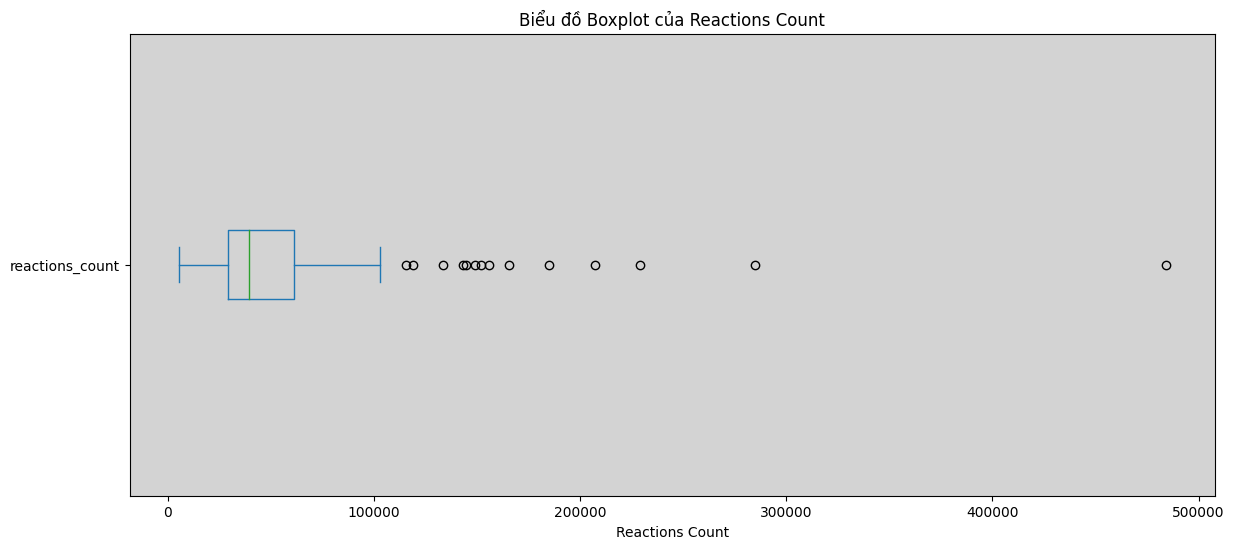

In [33]:
fig, ax = plt.subplots(figsize=(14, 6))
df_reactions['reactions_count'].plot(kind='box', vert=False, ax=ax)

ax.set_facecolor('lightgray')

plt.title('Biểu đồ Boxplot của Reactions Count')
plt.xlabel('Reactions Count')

plt.show()

In [14]:
df_reactions = pd.concat([raw_df, df_reactions], axis=1).drop('reactions', axis=1)
df_reactions[['time','post_text','like','love','haha','wow','care','angry','sad',
                                 'shares','comments','reaction_count']]

,time,post_text,like,love,haha,wow,care,angry,sad,shares,comments,reaction_count
0,2023-11-30 15:30:55,🔴⚪️ Arteta on Havertz moment: “He’s becoming b...,4592.0,776.0,25.0,8.0,57.0,6.0,8.0,15,220,5458
1,2023-11-30 14:30:21,⚪️✨ Nico Páz: “This is a dream! I didn't know ...,21995.0,6480.0,119.0,15.0,500.0,1.0,8.0,111,649,29110
2,2023-11-30 08:23:21,🔴 Ten Hag: “I am responsible for this. This is...,25947.0,689.0,8586.0,57.0,92.0,272.0,151.0,295,5200,35794
3,2023-11-30 05:27:09,⚪️ Nico Páz after scoring his first goal for R...,71563.0,21626.0,154.0,57.0,1646.0,7.0,2.0,718,1200,95055
4,2023-11-30 05:00:00,Who’s your Man of the UCL Night? 😮‍💨,49187.0,9093.0,83.0,61.0,649.0,17.0,22.0,1000,3400,59112
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023-11-26 00:05:35,Who’s gonna finish 𝐡𝐢𝐠𝐡𝐞𝐫 in PL? 👀✨,31500.0,6300.0,119.0,37.0,234.0,6.0,8.0,167,1800,42000
116,2023-11-25 23:28:44,One more 3-0 win for Bayer 🔴⚫️🇩🇪\n\nXabi Alons...,65250.0,13050.0,119.0,37.0,234.0,6.0,8.0,534,1100,87000
117,2023-11-25 23:24:41,Chelsea are 3-1 down vs Newcastle now! ⚪️⚫️,29250.0,5850.0,119.0,37.0,234.0,6.0,8.0,182,3500,39000
118,2023-11-25 23:15:28,🔵🔴🇧🇷 Barça director Deco: “It has not yet been...,22500.0,4500.0,119.0,37.0,234.0,6.0,8.0,47,183,30000


In [37]:
df_interactions = df_reactions[['like','love','haha','wow','care','angry','sad',
                                 'shares','comments','reaction_count']]
df_interactions.describe().T

,count,mean,std,min,25%,50%,75%,max
like,120.0,46720.283333,45210.897572,4592.0,24152.25,31442.0,51307.75,363000.0
love,120.0,8453.291667,11306.147240,360.0,2662.50,4574.5,8750.50,72600.0
haha,120.0,609.258333,1709.998081,10.0,82.25,119.0,173.00,12026.0
wow,120.0,63.391667,87.034939,8.0,34.00,37.0,41.25,662.0
care,120.0,411.725000,666.227798,43.0,205.50,234.0,295.00,5684.0
angry,120.0,21.066667,59.234151,1.0,5.00,6.0,7.00,370.0
sad,120.0,361.175000,2051.473124,1.0,7.00,8.0,10.25,18749.0
shares,120.0,477.050000,1797.574785,11.0,58.00,114.5,315.50,19000.0
comments,120.0,1538.175000,2166.294985,47.0,398.75,715.5,1725.00,16000.0
reaction_count,120.0,59203.091667,60706.913514,5458.0,29069.25,39501.5,61289.25,484000.0


Thống kê thời gian thu thập dữ liệu

In [15]:
start_date = df['date'].min().strftime('%Y-%m-%d')
end_date = df['date'].max().strftime('%Y-%m-%d')

print('Start date: ' + start_date)
print('End date: ' + end_date)

Start date: 2023-11-25
End date: 2023-11-30


Thống kê tổng số Reactions theo ngày

In [16]:

df_date_ = raw_df.groupby(raw_df['time'].dt.day)[['reaction_count','shares','comments']].sum()
df_date_

,reaction_count,shares,comments
time,,,
25,194000,879,5187
26,1770000,25347,53869
27,1943241,9017,47032
28,1093783,8387,22626
29,1338022,6360,34879
30,765325,7256,20988


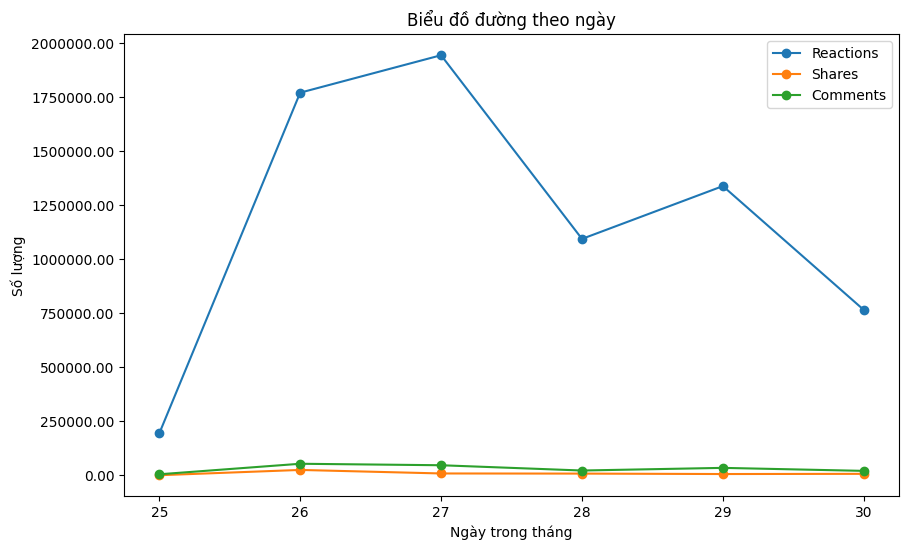

In [17]:

from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df_date_.index, df_date_['reaction_count'], label='Reactions', marker='o')
ax.plot(df_date_.index, df_date_['shares'], label='Shares', marker='o')
ax.plot(df_date_.index, df_date_['comments'], label='Comments', marker='o')

ax.set_xlabel('Ngày trong tháng')
ax.set_ylabel('Số lượng')
ax.set_title('Biểu đồ đường theo ngày')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax.legend()

plt.show()

Thống kê về từng loại reactions theo ngày

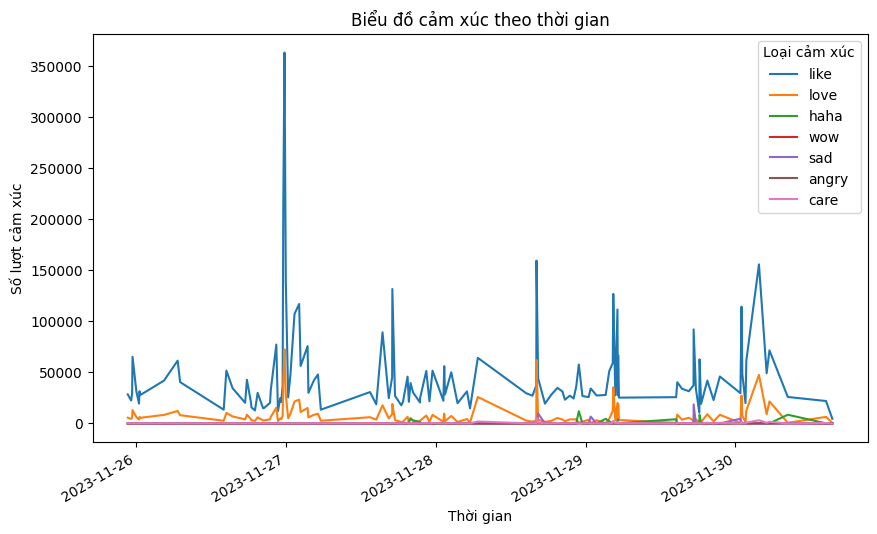

In [18]:
df_emotions = df_reactions[['time', 'like', 'love', 'haha', 'wow', 'sad', 'angry', 'care']]


df_emotions.set_index('time', inplace=True)

df_emotions.plot( figsize=(10, 6))
plt.title('Biểu đồ cảm xúc theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Số lượt cảm xúc')
plt.legend(title='Loại cảm xúc')

plt.show()


Thống kê số post được đăng theo từng khung giờ trong ngày

In [19]:
df

,time,timestamp,reaction_count,date
0,22:43:00,1700926980,38000,2023-11-25
1,23:15:28,1700928928,30000,2023-11-25
2,23:24:41,1700929481,39000,2023-11-25
3,23:28:44,1700929724,87000,2023-11-25
4,00:05:35,1700931935,42000,2023-11-26
...,...,...,...,...
115,05:00:00,1701295200,59112,2023-11-30
116,05:27:09,1701296829,95055,2023-11-30
117,08:23:21,1701307401,35794,2023-11-30
118,14:30:21,1701329421,29110,2023-11-30


In [20]:
raw_df['post_hour'] = raw_df['time'].dt.hour

df_hour = raw_df.groupby('post_hour').size()

df_hour

post_hour
0     11
1      9
2      3
3      6
4      5
5     10
6      2
7      1
8      1
13     1
14     7
15     5
16     5
17     9
18     8
19     7
20     6
21     6
22     7
23    11
dtype: int64

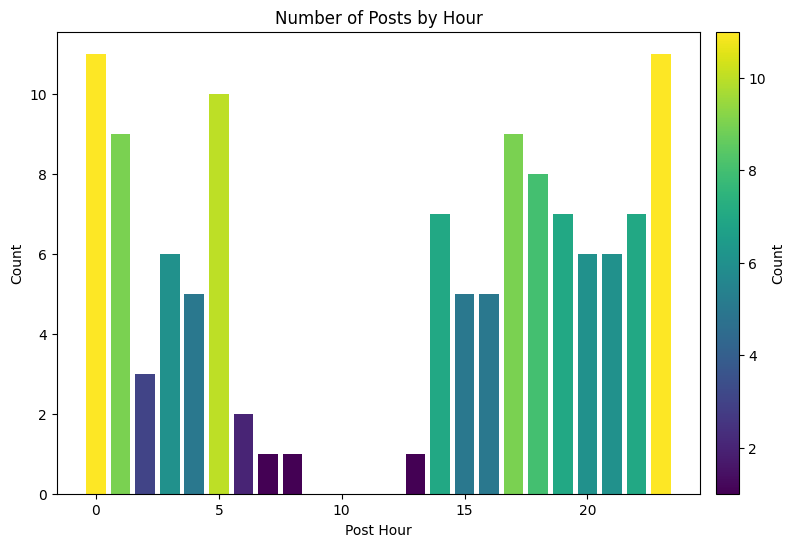

In [21]:
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

norm = Normalize(vmin=df_hour.min(), vmax=df_hour.max())

colormap = plt.cm.viridis

sm = ScalarMappable(cmap=colormap, norm=norm)

fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(df_hour.index, df_hour, color=colormap(norm(df_hour)))

# Set labels and title
ax.set_xlabel('Post Hour')
ax.set_ylabel('Count')
ax.set_title('Number of Posts by Hour')

cbar = plt.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Count')

plt.show()


In [22]:
hour_with_max_post = df_hour.idxmax()
max_post_count = df_hour.max()

hour_with_min_post = df_hour.idxmin()
min_post_count = df_hour.min()

print(f"Thời gian có ít bài post nhất vào: {hour_with_min_post}h với {min_post_count} post")

print(f"Thời gian có nhiều bài post nhất vào: {hour_with_max_post}h với {max_post_count} post")

Thời gian có ít bài post nhất vào: 7h với 1 post
Thời gian có nhiều bài post nhất vào: 0h với 11 post


Thống kê tổng số reactions của các post được đăng theo từng khung giờ trong ngày

In [23]:
df_hour_reactions = df_reactions[['time', 'like', 'love', 'haha', 'wow', 'sad', 'angry', 'care', 'reaction_count', 'comments', 'shares']]
df_hour_reactions['post_hour'] = df_hour_reactions['time'].dt.hour
df_hour_reactions

C:\Users\Laptop VINHLINK\AppData\Local\Temp\ipykernel_18572\2429715170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hour_reactions['post_hour'] = df_hour_reactions['time'].dt.hour


,time,like,love,haha,wow,sad,angry,care,reaction_count,comments,shares,post_hour
0,2023-11-30 15:30:55,4592.0,776.0,25.0,8.0,8.0,6.0,57.0,5458,220,15,15
1,2023-11-30 14:30:21,21995.0,6480.0,119.0,15.0,8.0,1.0,500.0,29110,649,111,14
2,2023-11-30 08:23:21,25947.0,689.0,8586.0,57.0,151.0,272.0,92.0,35794,5200,295,8
3,2023-11-30 05:27:09,71563.0,21626.0,154.0,57.0,2.0,7.0,1646.0,95055,1200,718,5
4,2023-11-30 05:00:00,49187.0,9093.0,83.0,61.0,22.0,17.0,649.0,59112,3400,1000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
115,2023-11-26 00:05:35,31500.0,6300.0,119.0,37.0,8.0,6.0,234.0,42000,1800,167,0
116,2023-11-25 23:28:44,65250.0,13050.0,119.0,37.0,8.0,6.0,234.0,87000,1100,534,23
117,2023-11-25 23:24:41,29250.0,5850.0,119.0,37.0,8.0,6.0,234.0,39000,3500,182,23
118,2023-11-25 23:15:28,22500.0,4500.0,119.0,37.0,8.0,6.0,234.0,30000,183,47,23


In [24]:
cols = ['like', 'love', 'haha', 'wow', 'sad', 'angry', 'care','reaction_count', 'comments', 'shares']
df_hour_reactions = df_hour_reactions.groupby("post_hour")[cols].sum()


In [29]:
df_hour_reactions

,like,love,haha,wow,sad,angry,care,reaction_count,comments,shares
post_hour,,,,,,,,,,
0,525871.0,96300.0,2521.0,743.0,11465.0,162.0,4052.0,681180,19427,2683
1,482755.0,81943.0,1365.0,655.0,413.0,60.0,2898.0,598481,16814,2341
2,223391.0,42009.0,312.0,109.0,57.0,18.0,906.0,289094,4123,2565
3,360548.0,75255.0,7357.0,659.0,556.0,80.0,4054.0,461801,8515,4240
4,297482.0,67624.0,761.0,447.0,42.0,32.0,3940.0,380712,3883,2046
5,459764.0,91460.0,5046.0,534.0,273.0,259.0,6206.0,570934,15464,4340
6,125732.0,38226.0,268.0,104.0,15.0,7.0,2168.0,174316,2300,2138
7,40500.0,8100.0,119.0,37.0,8.0,6.0,234.0,54000,321,85
8,25947.0,689.0,8586.0,57.0,151.0,272.0,92.0,35794,5200,295


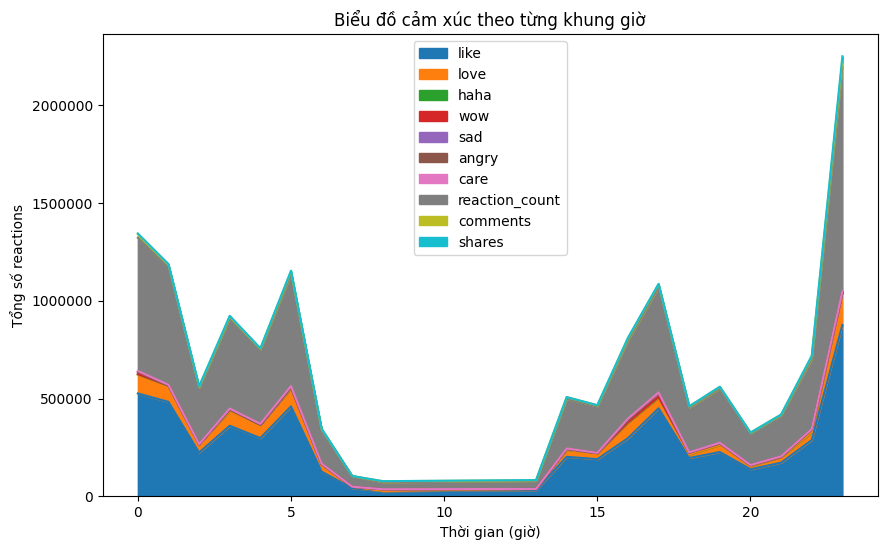

In [34]:
fig, ax = plt.subplots(figsize=(10, 6))

df_hour_reactions.plot(kind='area', ax=ax)

ax.get_yaxis().get_major_formatter().set_scientific(False)

plt.title('Biểu đồ cảm xúc theo từng khung giờ')
plt.xlabel('Thời gian (giờ)')
plt.ylabel('Tổng số reactions')

plt.show()

Post With max Reactions

In [35]:
df_reactions[['post_text','time','comments','shares','reaction_count']].loc[df_reactions['reaction_count'] == df_reactions['reaction_count'].max()]


,post_text,time,comments,shares,reaction_count
89,🤯 Goal of the year contender by Alejandro Garn...,2023-11-26 23:48:24,16000,19000,484000


In [54]:
max_reactions = raw_df.iloc[raw_df["reaction_count"].idxmax()]

post_max_reaction_id = max_reactions["post_id"]
post_max_reaction_text = max_reactions["post_text"]
post_max_reaction_time = max_reactions["time"]
post_max_reactions = max_reactions["reaction_count"]


print(f"Post_id: {post_max_reaction_id}")
print(f"Post_text: {post_max_reaction_text}")
print(f"Time posted: {post_max_reaction_time}")
print(f"Reactions: {post_max_reactions}")

Post_id: 949884223605736
Post_text: 🤯 Goal of the year contender by Alejandro Garnacho… inspired by his idol Cristiano ✨

“One of the best bicycle kick you’ll ever see!” 🚲
Time posted: 2023-11-26 23:48:24
Reactions: 484000


In [61]:
cols = ["post_id", "post_text", "time", "reactions", "reaction_count", "comments", "shares"]
raw_df[raw_df["reaction_count"] >= 100000][cols].shape[0]

16

In [62]:
raw_df[raw_df["reaction_count"] >= 100000][cols].head()

,post_id,post_text,time,reactions,reaction_count,comments,shares
5,951869110073914,🤖 Jude Bellingham is the first player in Real ...,2023-11-30 03:46:12,"{'like': 155731, 'love': 47615, 'haha': 279, '...",207119,3800,3600
9,951787750082050,GARNACHOOO! Man United 1-0! 🔴✨,2023-11-30 00:58:46,"{'like': 114339, 'love': 27384, 'haha': 983, '...",144718,3300,803
18,951563376771154,❌👋 𝐎𝐅𝐅𝐈𝐂𝐈𝐀𝐋 | Teams who are OUT of the UEFA Ch...,2023-11-29 17:18:46,"{'like': 92115, 'love': 1748, 'haha': 2123, 'w...",115457,7100,567
27,951265113467647,🏆🇪🇺 Qualified to UCL round of 16:\n\n🏴󠁧󠁢󠁥󠁮󠁧󠁿 M...,2023-11-29 05:06:58,"{'like': 111527, 'love': 20191, 'haha': 133, '...",133286,2900,1400
29,951253263468832,JOAAAAOOO FELIX! 🔵🔴🇵🇹\n\nThe two Joãos appear ...,2023-11-29 04:26:50,"{'like': 126789, 'love': 35489, 'haha': 357, '...",165282,1400,894


Thống kê comments, shares các post theo ngày

In [71]:
num_comments = raw_df.groupby(raw_df["time"].dt.day)['comments'].sum()
num_comments

time
25     5187
26    53869
27    47032
28    22626
29    34879
30    20988
Name: comments, dtype: int64

In [73]:
num_share = raw_df.groupby(raw_df["time"].dt.day)['shares'].sum()
num_share

time
25      879
26    25347
27     9017
28     8387
29     6360
30     7256
Name: shares, dtype: int64

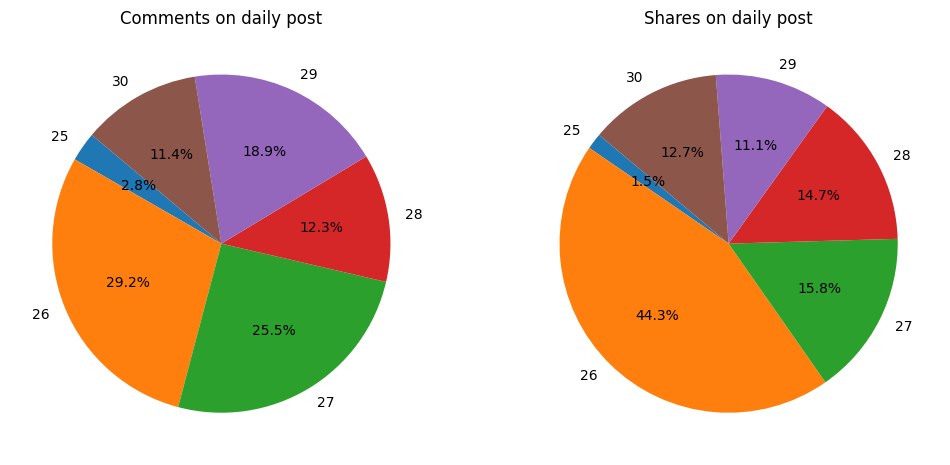

In [77]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.pie(num_comments.values, labels=num_comments.index, autopct='%1.1f%%', startangle=140)
ax1.set_title("Comments on daily post") 

ax2.pie(num_share.values, labels=num_share.index, autopct='%1.1f%%', startangle=140)
ax2.set_title("Shares on daily post") 

plt.show()


Tỉ lệ giữa các loại emotions

In [39]:
interaction = []
interaction.append(df_reactions['like'].sum())
interaction.append(df_reactions['love'].sum())
interaction.append(df_reactions['haha'].sum())
interaction.append(df_reactions['care'].sum()+df_reactions['angry'].sum() + df_reactions['sad'].sum()
         + df_reactions['wow'].sum())
interaction

[5606434.0, 1014395.0, 73111.0, 102883.0]

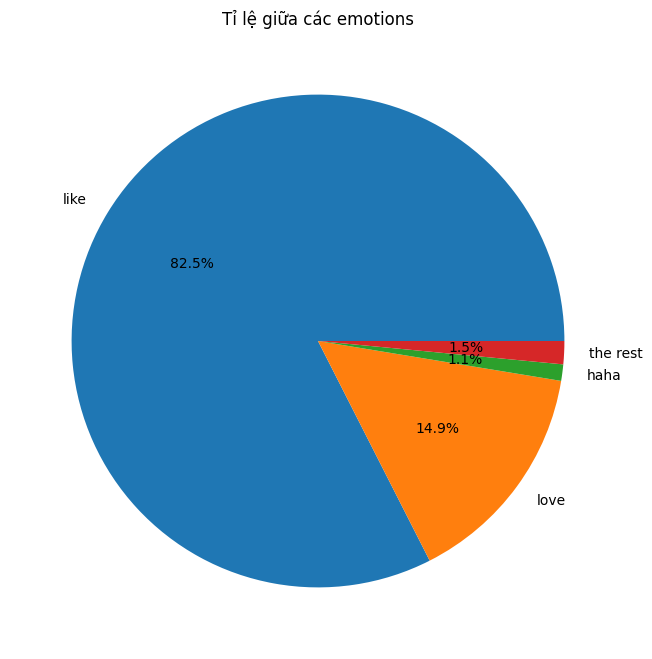

In [44]:
plt.figure(figsize=(8, 8))
plt.pie(interaction, labels = ['like','love','haha','the rest'], autopct = '%1.1f%%', shadow = False)
plt.title('Tỉ lệ giữa các emotions')
plt.show()


Mật độ Reactions, Comments, Shares

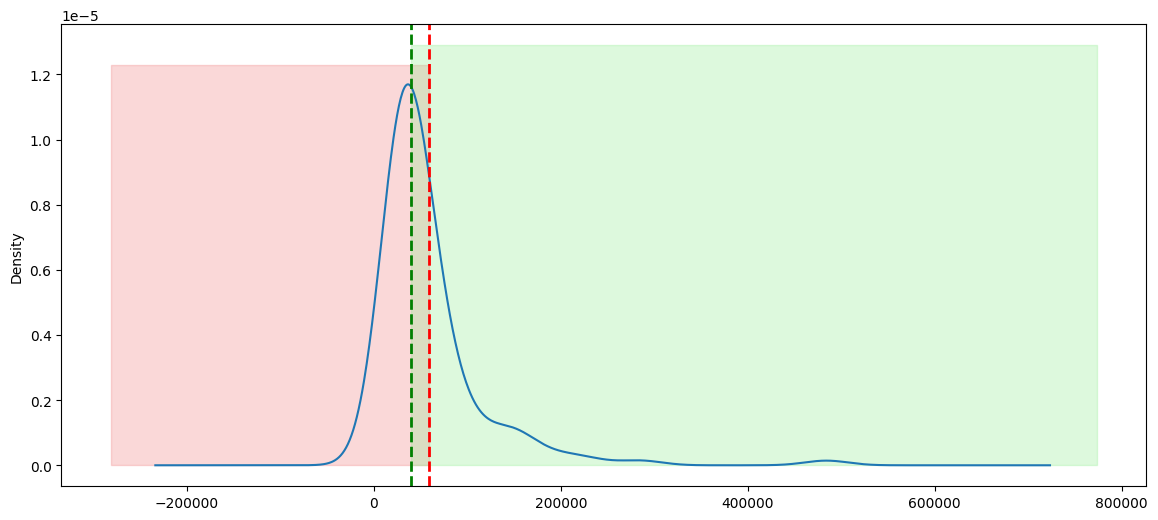

In [47]:
ax = df_reactions['reaction_count'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(df_reactions['reaction_count'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
ax.axvline(df_reactions['reaction_count'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
ax.fill_betweenx(y=[0, ax.get_ylim()[1]], x1=ax.get_xlim()[0], x2=df_reactions['reaction_count'].mean(), color='lightcoral', alpha=0.3)
ax.fill_betweenx(y=[0, ax.get_ylim()[1]], x1=df_reactions['reaction_count'].median(), x2=ax.get_xlim()[1], color='lightgreen', alpha=0.3)

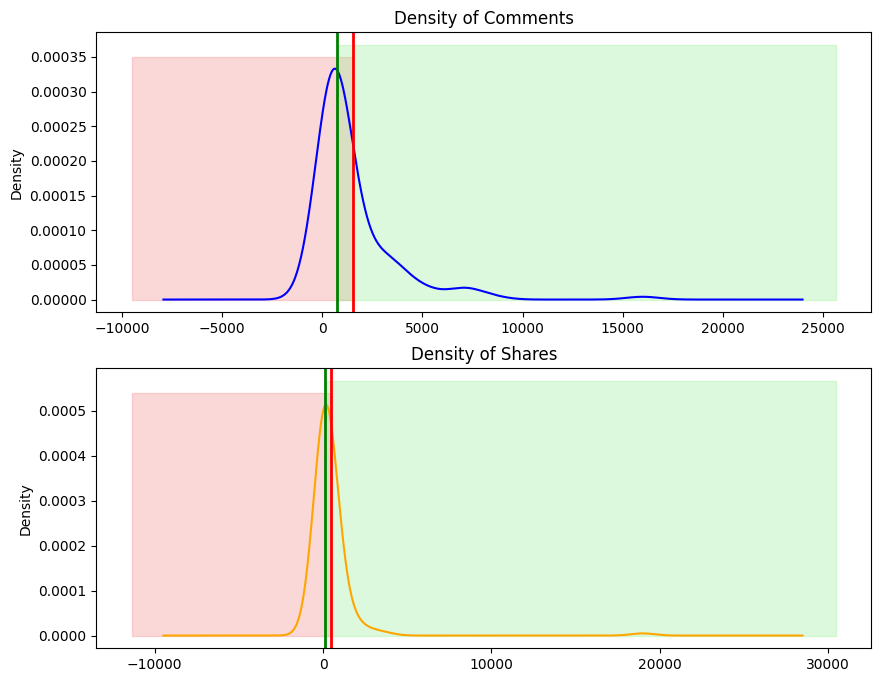

In [82]:
fig = plt.figure(figsize=(10, 8))

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)


df_reactions['comments'].plot(kind='density', ax=ax1, color='blue', label='Density')  
ax1.axvline(df_reactions['comments'].mean(), color='red', linewidth=2, label='Mean')
ax1.axvline(df_reactions['comments'].median(), color='green', linewidth=2, label='Median')
ax1.set_title('Density of Comments')
ax1.fill_betweenx(y=[0, ax1.get_ylim()[1]], x1=ax1.get_xlim()[0], x2=df_reactions['comments'].mean(), color='lightcoral', alpha=0.3)
ax1.fill_betweenx(y=[0, ax1.get_ylim()[1]], x1=df_reactions['comments'].median(), x2=ax1.get_xlim()[1], color='lightgreen', alpha=0.3)

df_reactions['shares'].plot(kind='density', ax=ax2, color='orange', label='Density')  # Thêm ax=ax2 để vẽ lên cùng một subplot
ax2.axvline(df_reactions['shares'].mean(), color='red', linewidth=2, label='Mean')
ax2.axvline(df_reactions['shares'].median(), color='green', linewidth=2, label='Median')
ax2.set_title('Density of Shares')
ax2.fill_betweenx(y=[0, ax2.get_ylim()[1]], x1=ax2.get_xlim()[0], x2=df_reactions['shares'].mean(), color='lightcoral', alpha=0.3)
ax2.fill_betweenx(y=[0, ax2.get_ylim()[1]], x1=df_reactions['shares'].median(), x2=ax2.get_xlim()[1], color='lightgreen', alpha=0.3)


plt.show()


WordCloud

In [26]:
df_text = raw_df[['post_id','post_text']]
text = str(df_text['post_text'])

df_text

,post_id,post_text
0,952134820047343,🔴⚪️ Arteta on Havertz moment: “He’s becoming b...
1,952112546716237,⚪️✨ Nico Páz: “This is a dream! I didn't know ...
2,951976760063149,🔴 Ten Hag: “I am responsible for this. This is...
3,951909296736562,⚪️ Nico Páz after scoring his first goal for R...
4,951897683404390,Who’s your Man of the UCL Night? 😮‍💨
...,...,...
115,949353396992152,Who’s gonna finish 𝐡𝐢𝐠𝐡𝐞𝐫 in PL? 👀✨
116,949335846993907,One more 3-0 win for Bayer 🔴⚫️🇩🇪\n\nXabi Alons...
117,949333873660771,Chelsea are 3-1 down vs Newcastle now! ⚪️⚫️
118,949329466994545,🔵🔴🇧🇷 Barça director Deco: “It has not yet been...


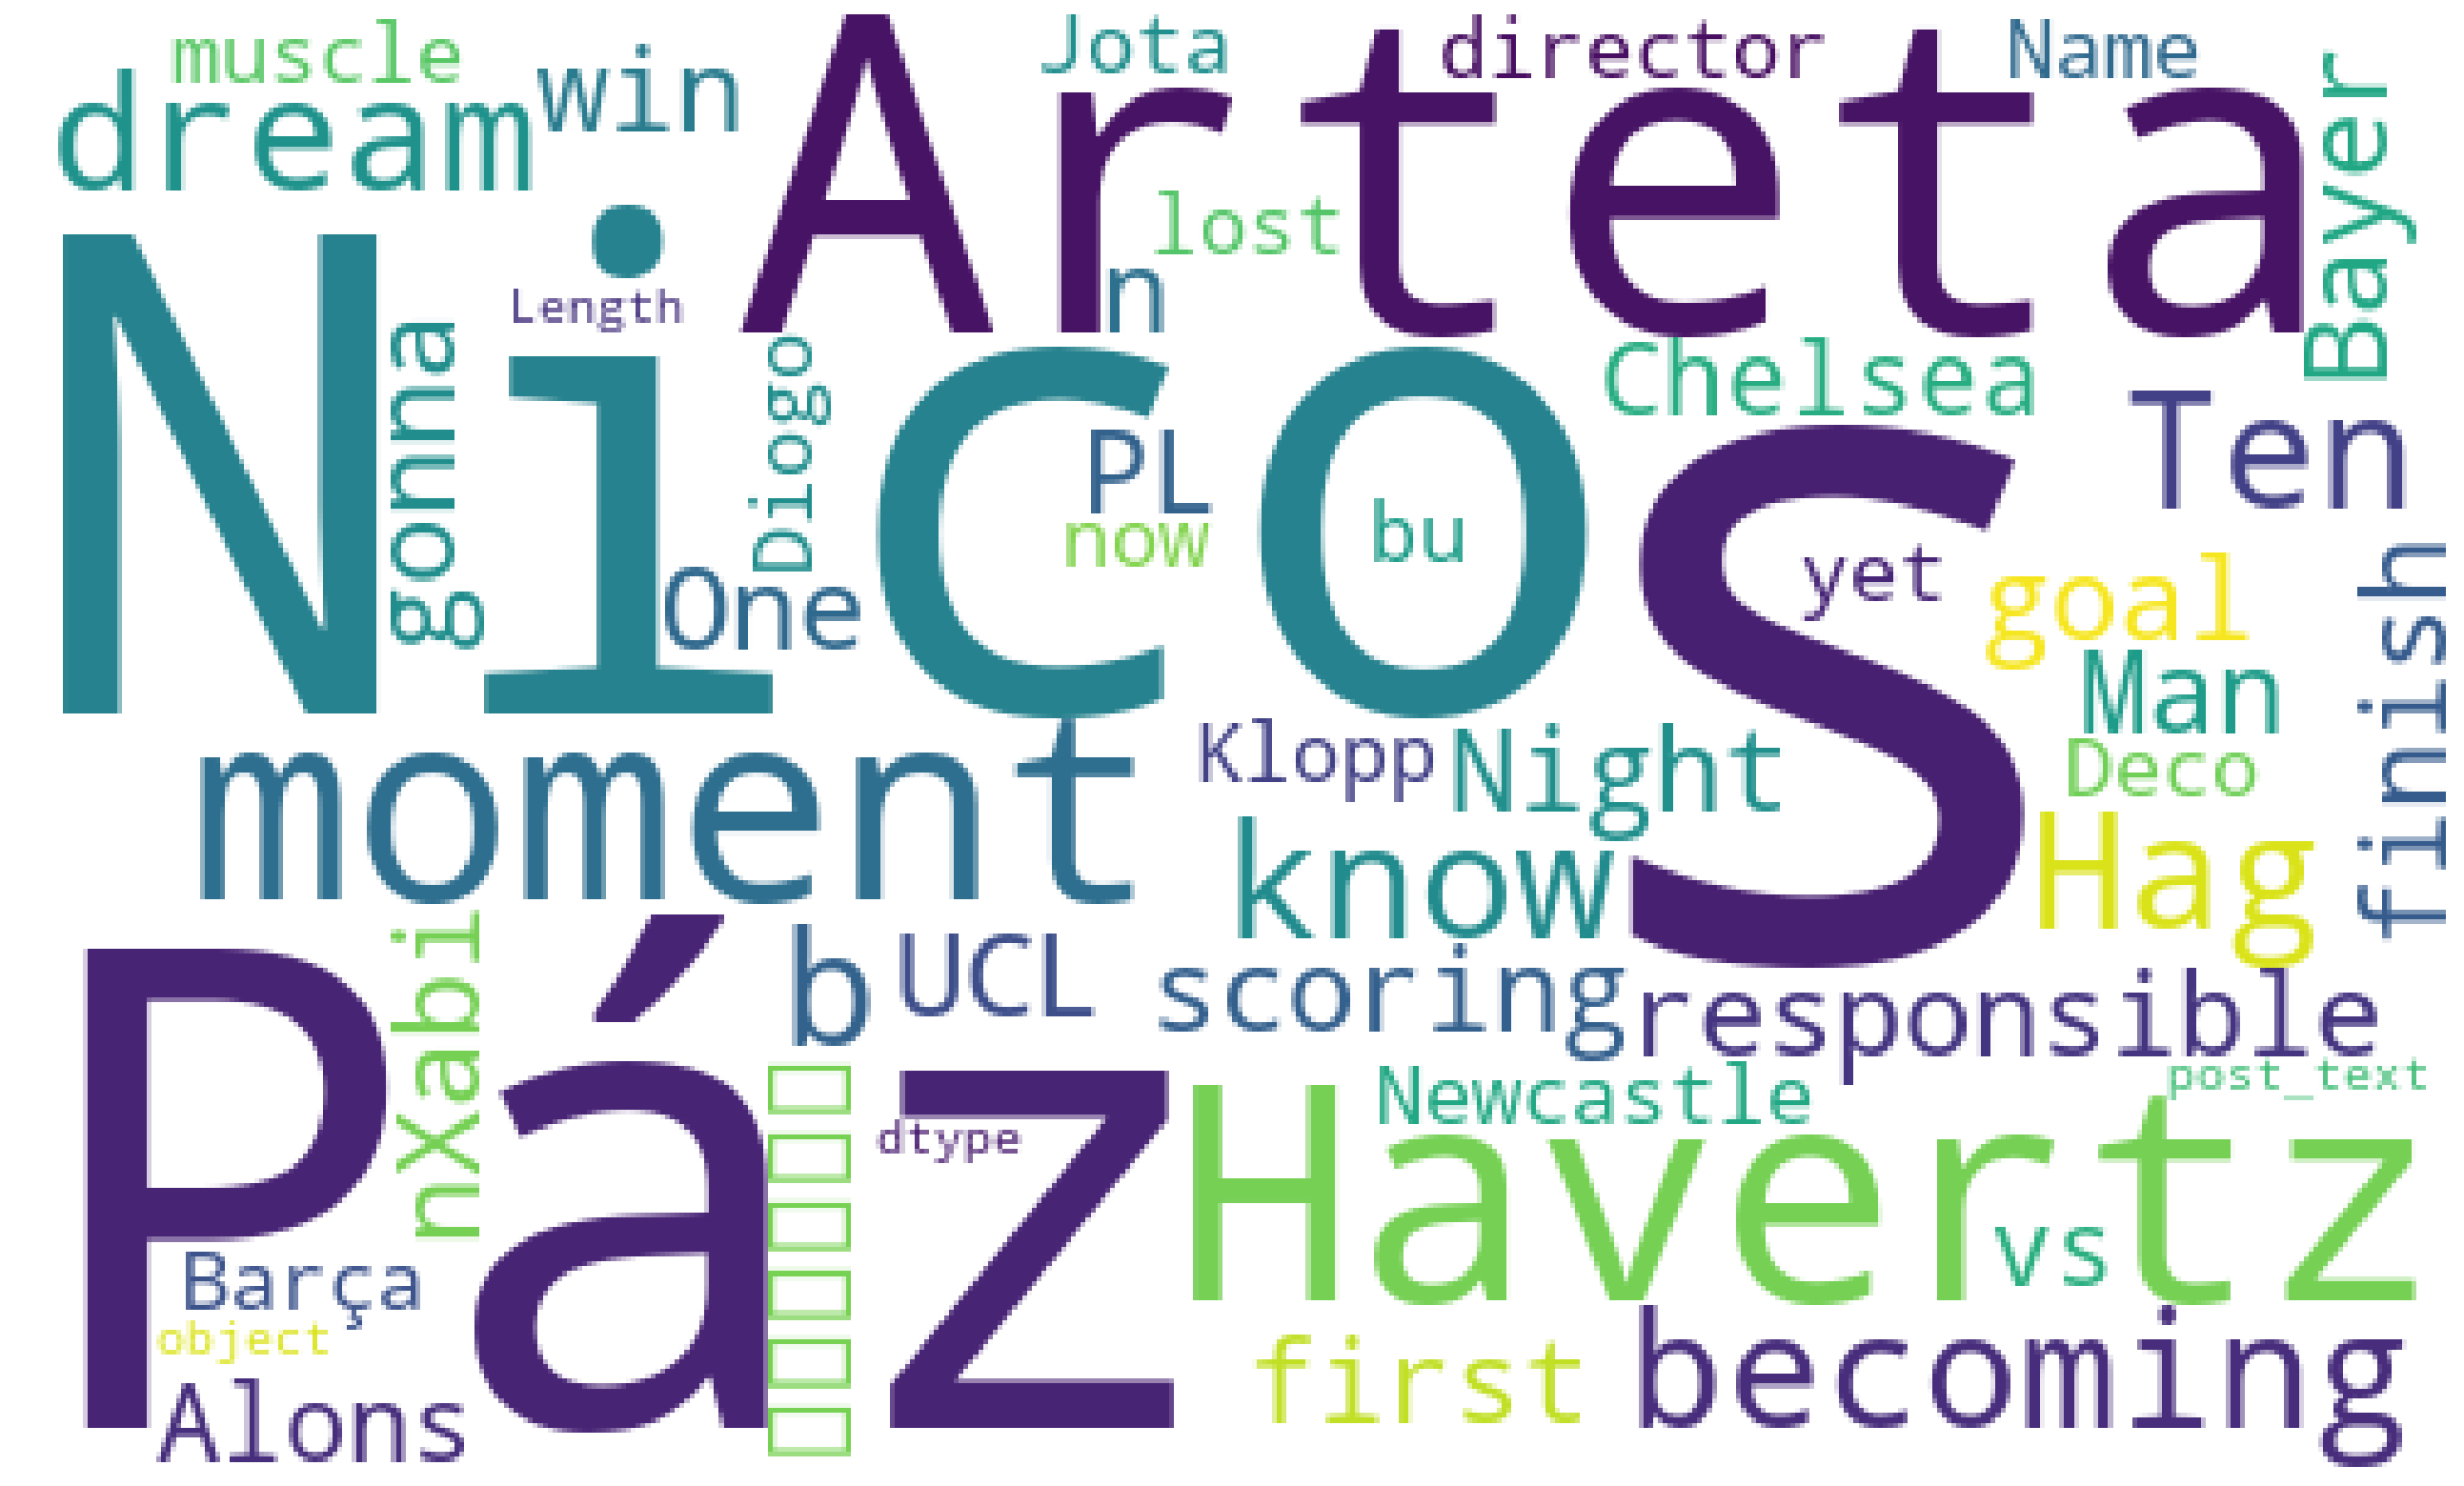

In [30]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

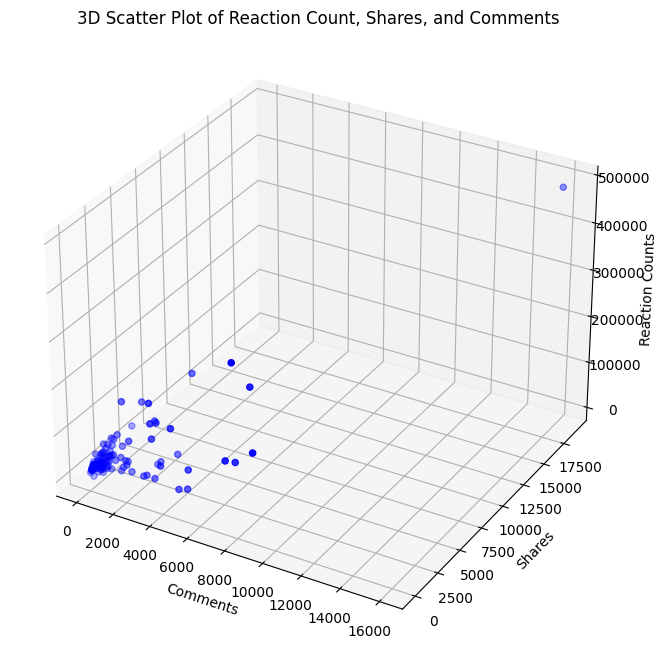

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'raw_df' is your DataFrame
x = raw_df['reaction_count']
y = raw_df['shares']
z = raw_df['comments']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(z, y, x, c='blue', marker='o')

ax.set_xlabel('Comments')
ax.set_ylabel('Shares')
ax.set_zlabel('Reaction Counts')

plt.title('3D Scatter Plot of Reaction Count, Shares, and Comments')
plt.show()


In [ ]:
Y = np.array(x)
Y.reshape(120,1)
Y.shape

(120,)

In [ ]:
y = np.array(y)
z = np.array(z)
X = np.vstack((y, z)).T